In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('admissions.csv')

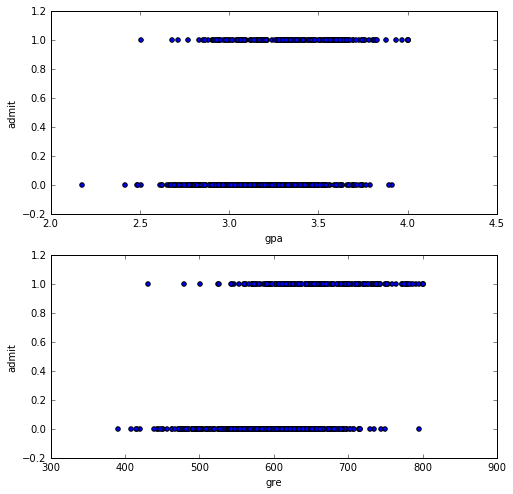

In [3]:
fig = plt.figure(figsize = (8,8))

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

data.plot('gpa','admit',kind='scatter',ax=ax1)
data.plot('gre','admit',kind='scatter',ax=ax2)

plt.show()

In [4]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
LogisticModel = lr.fit(data[['gpa']],data[['admit']])

/Users/Yasha/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [5]:
LogisticModel

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## GPA VS ADMISSION

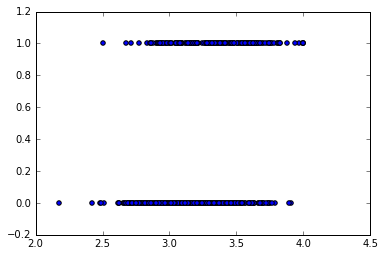

In [6]:
plt.scatter(data['gpa'],data['admit'])

#### PROBABILITY THAT EACH STUDENT IS NOT ADMITTED BASED ON THEIR GPA SCORE

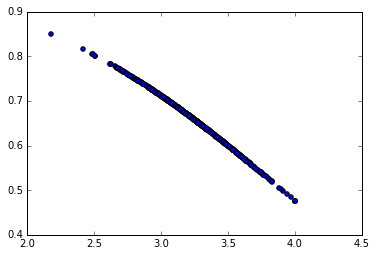

In [7]:
probabilities = LogisticModel.predict_proba(data[['gpa']])
plt.scatter(data[['gpa']],probabilities[:,0])

#### PROBABILITY THAT EACH STUDENT IS ADMITTED BASED ON THEIR GPA SCORE

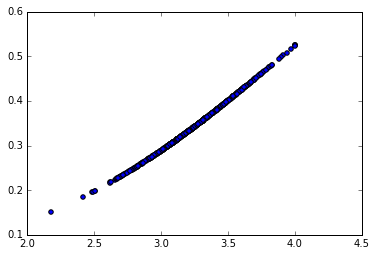

In [8]:
plt.scatter(data[['gpa']],probabilities[:,1])

#### SHOW PREDICTION OF ADMISSION BASED ON GPA FOR EACH STUDENT:

In [9]:
lr = LogisticRegression()
lr.fit(data[['gpa']],data[['admit']])
probability1 = lr.predict(data[['gpa']])

for x in range(len(probability2)):
    print(data['gpa'][x],probability1[x])


/Users/Yasha/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


NameError: name 'probability2' is not defined

----

## GRE VS ADMISSION:

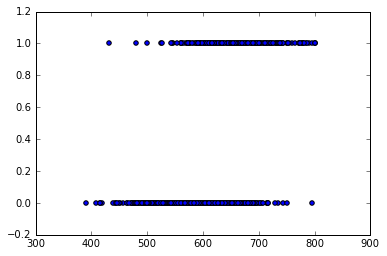

In [55]:
plt.scatter(data['gre'],data['admit'])

In [59]:
lr.fit(data[['gre']],data[['admit']])
lr

/Users/Yasha/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [64]:
probability2 = lr.predict_proba(data[['gre']])

#### PROBABILITY THAT EACH STUDENT WON'T BE ADMITTED BASED ON THEIR GRE:

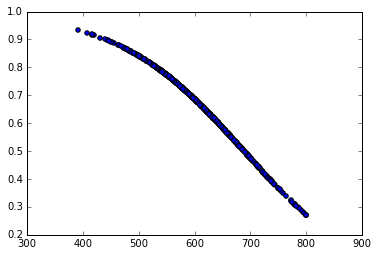

In [65]:
plt.scatter(data[['gre']],probability2[:,0])

#### PROBABILITY THAT EACH STUDENT WILL BE ADMITTED BASED ON THEIR GRE:

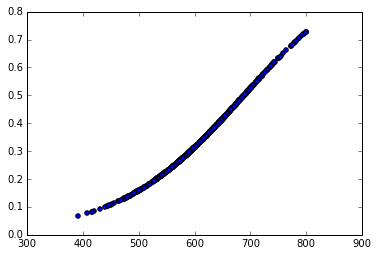

In [66]:
plt.scatter(data[['gre']],probability2[:,1])

#### SHOW PREDICTIONS OF ADMISSION BASED ON GRE FOR EACH STUDENT

In [12]:
lr = LogisticRegression()
lr.fit(data[['gre']],data[['admit']])
predictions = lr.predict(data[['gre']])

for x in range(10):
    print([data['gre'][x],predictions[x]])

[594.10299199999997, 0]
[631.52860700000008, 0]
[553.71439900000007, 0]
[551.08998499999996, 0]
[537.18489399999999, 0]
[442.76356699999997, 0]
[667.47218899999996, 0]
[561.71390499999995, 0]
[590.340371, 0]
[463.47018300000002, 0]


/Users/Yasha/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


---

## EXPERIMENTATIONS:

#### CAN WE TRACK SOME STATS BETWEEN GPA AND GRE?

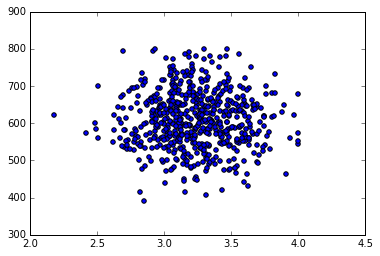

In [80]:
plt.scatter(data['gpa'],data['gre'])

Shit...If I knew how to squash them together with Linear Algebra...

In [ ]:
How would I squash this shit together?
Lets grab the median of the x-axis...
We wanna sqish it down to the regression line actually...

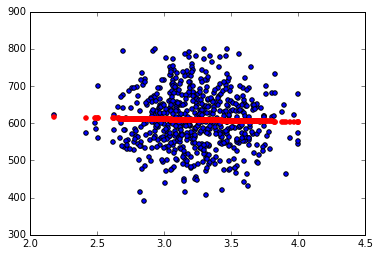

In [125]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, stderr_slope = linregress(data['gpa'],data['gre'])
x = data['gpa']
y = slope*x + intercept
plt.scatter(data['gpa'],data['gre'])
plt.scatter(x,y,color='r')

#### Now lets squash the points proportionally, along the lin-regress x-dimension

In [127]:
from __future__ import division

In [138]:
def squash(x_val,y_val,factor,slope,intercept):
    squished_Ys = []
    for index in range(len(y)):
        initial_distance = y[index] - ((x[index]*slope)+intercept)
        new_distance = initial_distance / factor
        squished_Ys.append(new_distance)
    return squished_Ys

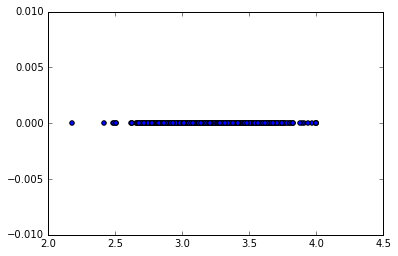

In [139]:
y_variables = squash(data['gpa'],data['gre'],2,slope,intercept)


plt.scatter(data['gpa'],y_variables)

----